In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas.io.data import DataReader

In [4]:
from datetime import datetime

In [91]:
tech_list = ['AAPL','GOOG','MSFT','AMZN','TSLA','GM','TM']

In [142]:
end = datetime.now()
start = datetime(end.year-4,end.month,end.day)

In [143]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [95]:
GM.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-08-18,31.410000,31.770000,31.340000,31.709999,9262100,31.709999
2015-08-19,31.610001,32.049999,31.370001,31.629999,12942400,31.629999
2015-08-20,31.459999,31.459999,30.830000,30.840000,13312100,30.840000
2015-08-21,30.459999,30.530001,29.570000,29.600000,26467500,29.600000
2015-08-24,27.299999,28.180000,24.620001,27.799999,34874700,27.799999


In [9]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-03-27,568.002570,568.002570,552.922516,558.462551,13100,558.462551
2014-03-28,561.202549,566.432590,558.672477,559.992504,41200,559.992504
2014-03-31,566.892592,567.002574,556.932537,556.972503,10800,556.972503
2014-04-01,558.712565,568.452595,558.712565,567.162558,7900,567.162558
2014-04-02,599.992707,604.832763,562.192568,567.002574,147100,567.002574


In [10]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,503.000000,503.000000,503.000000,503.000000,5.030000e+02,503.000000
mean,279.066341,281.342525,276.797952,279.074553,6.395608e+07,97.357737
std,208.113039,209.743171,206.687117,208.259250,3.014092e+07,21.593501
min,90.209999,90.699997,89.650002,90.279999,1.447960e+07,61.826556
25%,110.444999,112.025002,108.855004,109.765003,4.420400e+07,75.052136
50%,127.489998,128.330002,126.400002,127.300003,5.729800e+07,96.706827
75%,522.979981,527.504997,518.614967,523.454998,7.517850e+07,117.704435
max,649.900002,651.259979,644.469971,647.349983,2.663808e+08,131.942761


In [13]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2013-08-26 to 2015-08-24
Data columns (total 6 columns):
Open         503 non-null float64
High         503 non-null float64
Low          503 non-null float64
Close        503 non-null float64
Volume       503 non-null int64
Adj Close    503 non-null float64
dtypes: float64(5), int64(1)
memory usage: 27.5 KB


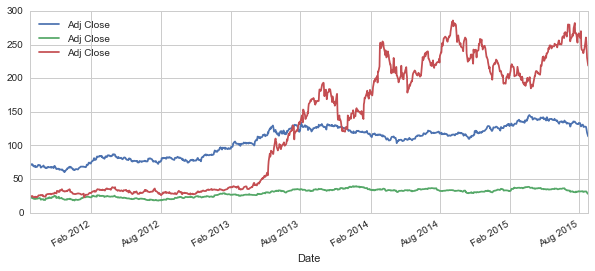

In [144]:
TM['Adj Close'].plot(legend=True,figsize=(10,4))
GM['Adj Close'].plot(legend=True,figsize=(10,4))
TSLA['Adj Close'].plot(legend=True,figsize=(10,4))

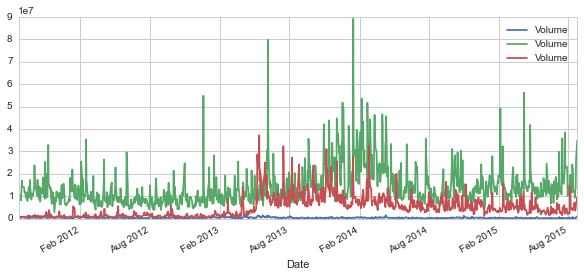

In [145]:
TM['Volume'].plot(legend=True,figsize=(10,4))
GM['Volume'].plot(legend=True,figsize=(10,4))
TSLA['Volume'].plot(legend=True,figsize=(10,4))

In [16]:
#moving average

In [148]:
ma_day = [10,20,50]

In [147]:
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)
    GOOG[column_name] = pd.rolling_mean(GOOG['Adj Close'],ma)
    MSFT[column_name] = pd.rolling_mean(MSFT['Adj Close'],ma)
    AMZN[column_name] = pd.rolling_mean(AMZN['Adj Close'],ma)

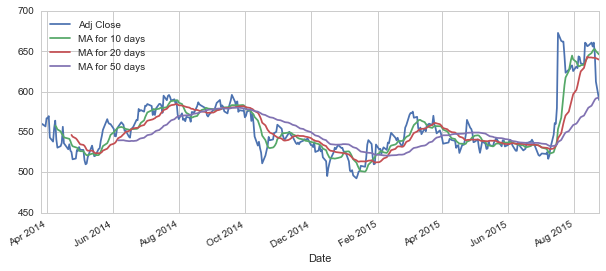

In [149]:
GOOG[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots = False,figsize=(10,4))

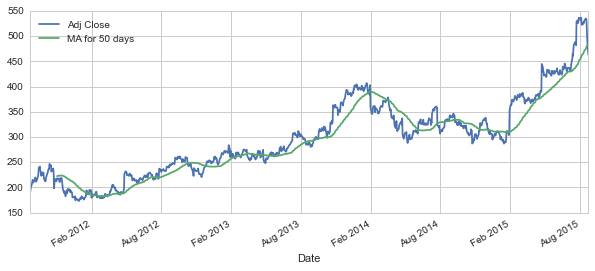

In [151]:
AMZN[['Adj Close','MA for 50 days']].plot(subplots = False,figsize=(10,4))

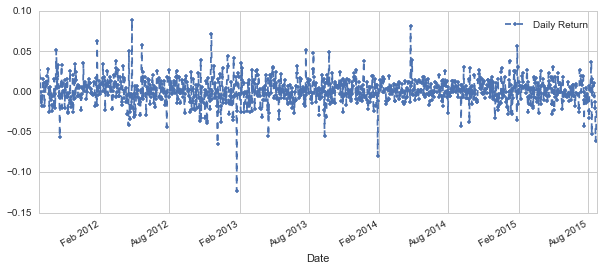

In [152]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='.')

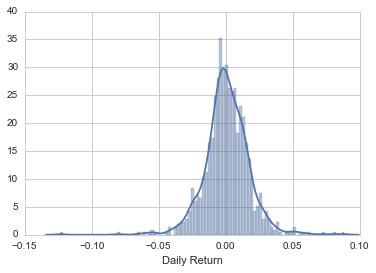

In [153]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100)

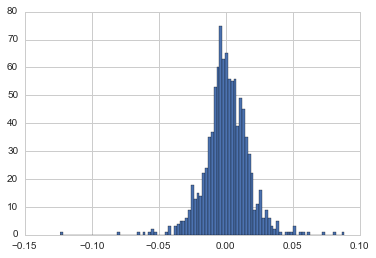

In [154]:
AAPL['Daily Return'].hist(bins=100)

In [47]:
closing_df=DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [76]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2010-08-24,32.051224,124.529999,NaN,20.957954
2010-08-25,32.446640,126.849998,NaN,21.010261
2010-08-26,32.097978,124.860001,NaN,20.766158
2010-08-27,32.276984,126.639999,NaN,20.862056
2010-08-30,32.394546,123.790001,NaN,20.609235


In [48]:
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2013-08-26,NaN,NaN,NaN,NaN
2013-08-27,-0.028590,-0.018448,NaN,-0.026062
2013-08-28,0.004728,0.002314,NaN,-0.007216
2013-08-29,0.001630,0.008523,NaN,0.016051
2013-08-30,-0.009111,-0.010564,NaN,-0.004471


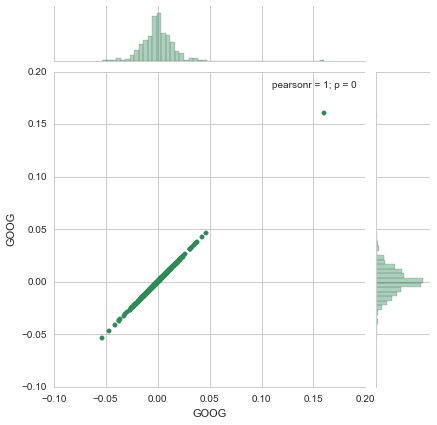

In [117]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

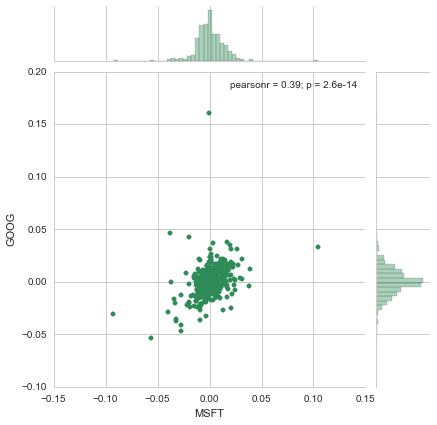

In [118]:
sns.jointplot('MSFT','GOOG',tech_rets,kind='scatter',color='seagreen')

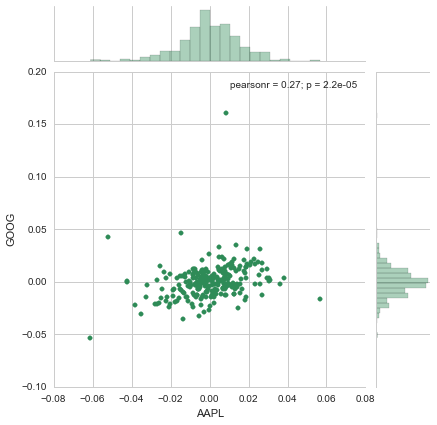

In [79]:
sns.jointplot('AAPL','GOOG',tech_rets,kind='scatter',color='seagreen')

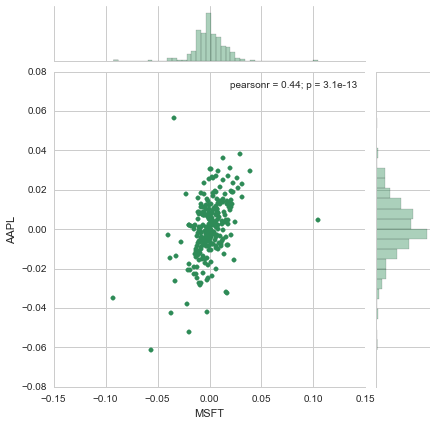

In [80]:
sns.jointplot('MSFT','AAPL',tech_rets,kind='scatter',color='seagreen')

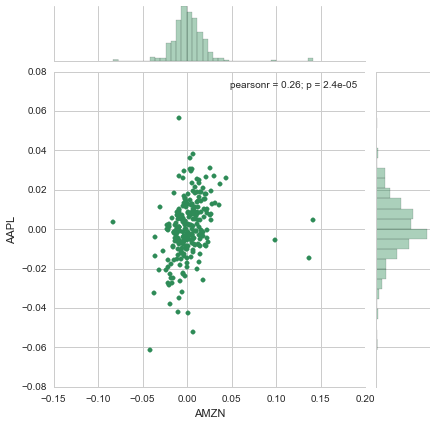

In [36]:
sns.jointplot('AMZN','AAPL',tech_rets,kind='scatter',color='seagreen')

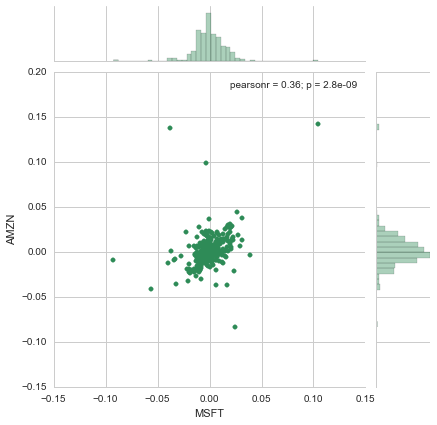

In [37]:
sns.jointplot('MSFT','AMZN',tech_rets,kind='scatter',color='seagreen')

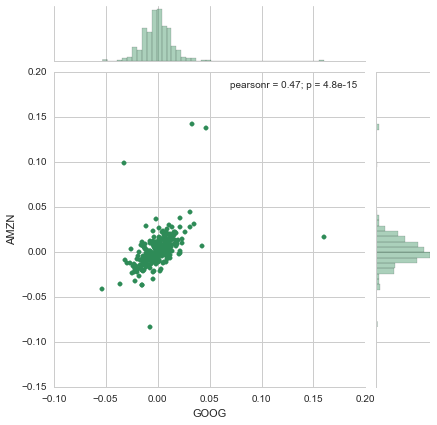

In [38]:
sns.jointplot('GOOG','AMZN',tech_rets,kind='scatter',color='seagreen')

In [50]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2013-08-26,NaN,NaN,NaN,NaN
2013-08-27,-0.028590,-0.018448,NaN,-0.026062
2013-08-28,0.004728,0.002314,NaN,-0.007216
2013-08-29,0.001630,0.008523,NaN,0.016051
2013-08-30,-0.009111,-0.010564,NaN,-0.004471


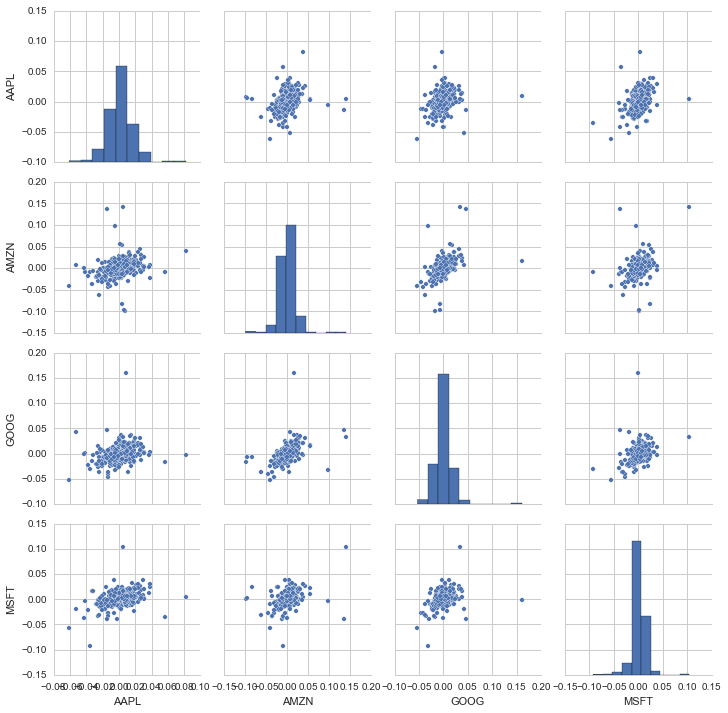

In [51]:
sns.pairplot(tech_rets.dropna())

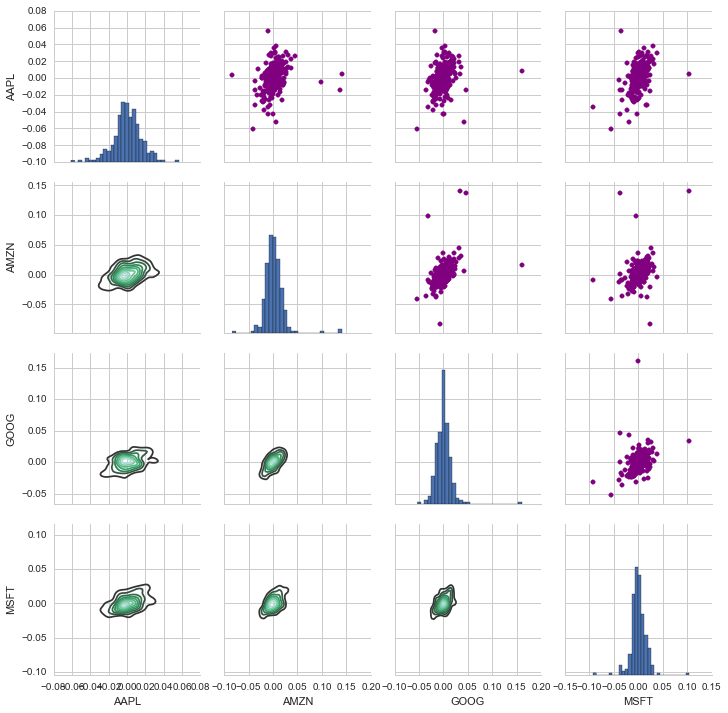

In [41]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,color='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

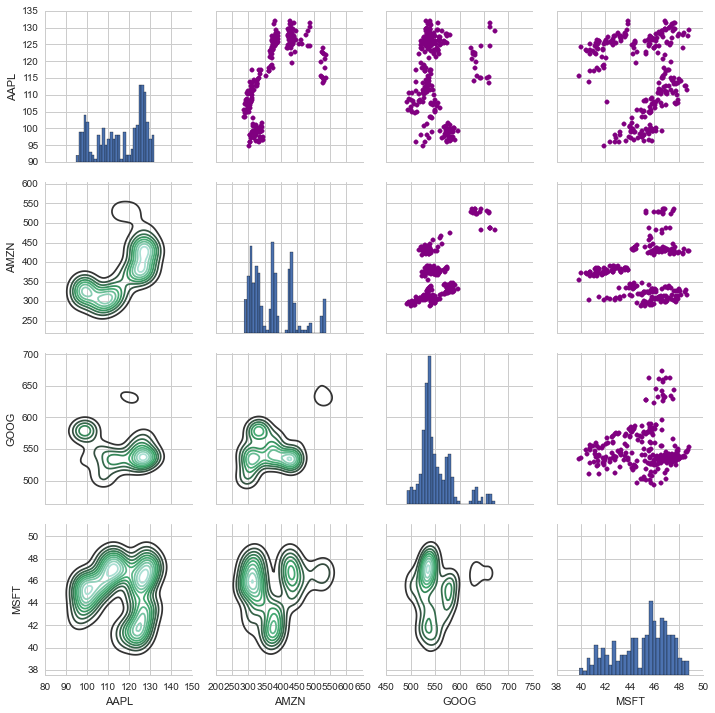

In [29]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,color='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

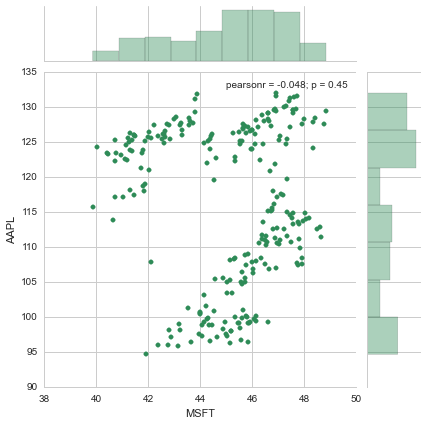

In [33]:
sns.jointplot('MSFT','AAPL',closing_df,kind='scatter',color='seagreen')

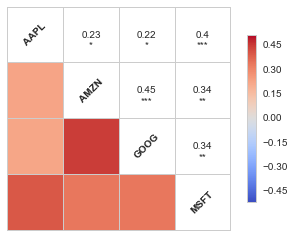

In [37]:
sns.corrplot(tech_rets.dropna(),annot=True)

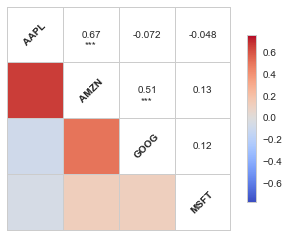

In [38]:
sns.corrplot(closing_df.dropna(),annot=True)

In [52]:
rets = tech_rets.dropna()

In [53]:
area = np.pi*20

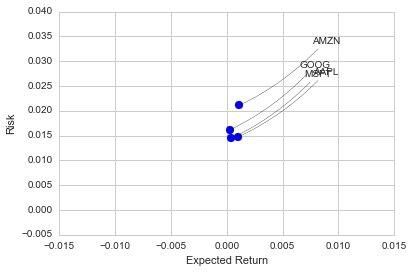

In [68]:
plt.scatter(rets.mean(),rets.std(),s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy = (x,y),xytext=(100,60),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-.1'))

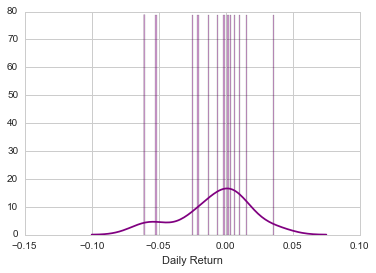

In [119]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [120]:
rets['AAPL'].quantile(0.05)

-0.022899451017092565

In [121]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']



In [122]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [76]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2014-03-27,568.002570,568.002570,552.922516,558.462551,13100,558.462551,NaN,NaN,NaN
2014-03-28,561.202549,566.432590,558.672477,559.992504,41200,559.992504,NaN,NaN,NaN
2014-03-31,566.892592,567.002574,556.932537,556.972503,10800,556.972503,NaN,NaN,NaN
2014-04-01,558.712565,568.452595,558.712565,567.162558,7900,567.162558,NaN,NaN,NaN
2014-04-02,599.992707,604.832763,562.192568,567.002574,147100,567.002574,NaN,NaN,NaN


In [127]:
# Get start price from GOOG.head()
start_price = 569.85

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

ValueError: scale <= 0

In [ ]:
M